What do you mean by ensemble technique, explain the Random Forest algorithm.

An ensemble technique in machine learning is a methodology that combines the predictions of multiple individual models (often called base models or weak learners) to make more accurate and robust predictions than any single model could achieve on its own. The idea behind ensemble methods is that by combining diverse models, the strengths of one model can compensate for the weaknesses of another, leading to improved overall performance. Ensemble techniques are widely used and have been shown to be highly effective in various machine learning tasks.

One popular ensemble technique is the Random Forest algorithm.

Random Forest Algorithm:

Random Forest is an ensemble learning method that is primarily used for classification and regression tasks. It builds multiple decision trees during training and combines their predictions to make more accurate and stable predictions. Here's how the Random Forest algorithm works:

Bootstrapping (Random Sampling):

Random Forest starts by creating multiple bootstrap samples from the original dataset. Bootstrap sampling involves randomly selecting data points with replacement from the training dataset. This results in multiple subsets of the data, each potentially containing duplicates and missing some original data points.
Decision Tree Construction:

For each bootstrap sample, a decision tree is constructed. However, there are a couple of key differences from a standard decision tree:
Random Feature Selection: At each node of the tree, instead of considering all features for splitting, only a random subset of features is considered. This helps to decorrelate the trees and reduce overfitting.
Tree Depth: Random Forest trees are often grown to a certain depth (not fully expanded) to prevent overfitting.
Voting (Classification) or Averaging (Regression):

Once all the decision trees are constructed, they are used to make predictions on new, unseen data points.
For classification tasks, each tree's prediction is treated as a "vote" for a class, and the class with the most votes is considered the final prediction.
For regression tasks, the predictions from all trees are averaged to produce the final prediction.
Key Advantages of Random Forest:

High Accuracy: Random Forest tends to produce highly accurate predictions due to the combination of multiple decision trees.
Reduced Overfitting: The randomness in feature selection and tree construction helps reduce overfitting compared to individual decision trees.
Robustness: Random Forest is less sensitive to outliers and noisy data compared to single decision trees.
Variable Importance: It can provide a measure of feature importance, indicating which features are more influential in making predictions.
Random Forest is a powerful and versatile algorithm used in a wide range of applications, including classification, regression, and feature selection. It's known for its robustness, ease of use, and ability to handle high-dimensional datasets effectively.

What does random refer to in ‘Random Forest’?

(Random Sampling):

Random Forest starts by creating multiple bootstrap samples from the original dataset. Bootstrap sampling involves randomly selecting data points with replacement from the training dataset. This results in multiple subsets of the data, each potentially containing duplicates and missing some original data points.

How decision trees in Random Forest are different from decision trees in the Decision Tree algorithm?

Random Feature Selection: At each node of the tree, instead of considering all features for splitting, only a random subset of features is considered. This helps to decorrelate the trees and reduce overfitting.
Tree Depth: Random Forest trees are often grown to a certain depth (not fully expanded) to prevent overfitting.

High Variance: Decision trees are capable of modeling complex relationships in the data. If not constrained, they can create deep and highly branched trees that fit the training data perfectly but generalize poorly.

Recursive Partitioning: Decision trees use a recursive partitioning approach, where they repeatedly split the data based on features. Without stopping criteria or pruning, this can lead to trees that are too deep and capture noise.

Sensitive to Outliers: Decision trees can be sensitive to outliers and anomalies in the data. They may create branches to accommodate unusual data points, leading to overfitting.

Lack of Smoothness: Decision trees make predictions by assigning a single class or value to each leaf node. This lack of smoothness in predictions can lead to overfitting, especially when the data has noise.

Parameters are internal variables learned by a machine learning model during training, directly influencing its predictions (e.g., weights in a neural network). Hyperparameters are configuration settings chosen before training that control the learning process itself (e.g., learning rate or tree depth). While parameters are adjusted automatically through training, hyperparameters are set manually and require optimization to find the best values for model performance.

Max Depth
Min Samples Split
Min Samples Leaf
Max Features

Bagging builds multiple independent base models (e.g., decision trees) in parallel, each trained on a different random subset of the training data, and combines their predictions by averaging (for regression) or voting (for classification) to reduce variance and improve model stability. Boosting, on the other hand, builds base models sequentially, with each subsequent model trained to correct the errors of the previous ones, resulting in improved accuracy and a focus on difficult-to-classify examples.

In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('Stroke Dataset - stroke.csv')
df.head(2).T

,0,1
id,9046,51676
gender,Male,Female
age,67.0,61.0
hypertension,0,0
heart_disease,1,0
ever_married,Yes,Yes
work_type,Private,Self-employed
Residence_type,Urban,Rural
avg_glucose_level,228.69,202.21
bmi,36.6,NaN


In [176]:
num_col=[]
cat_col=[]
for i in df.columns:
    try:
        df[i].astype(float)
        num_col.append(i)
    except:
        cat_col.append(i)

In [177]:
for i in cat_col:
    print(i,end=": ")
    print(df[i].unique())

gender: ['Male' 'Female' nan 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [178]:
for i in cat_col:
    mode_val = df[i].mode()[0]
    df[i].fillna(mode_val,inplace=True)

In [179]:
num_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [180]:
df.drop('id',axis=1,inplace=True)
num_col.remove('id')
num_col.remove('stroke')
num_col.remove('hypertension')
num_col.remove('heart_disease')

In [181]:
for i in  num_col:
    print(i,end=": ")
    print(df[i].nunique())

age: 104
avg_glucose_level: 3872
bmi: 418


C:\Users\farzi\AppData\Local\Temp\ipykernel_4748\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

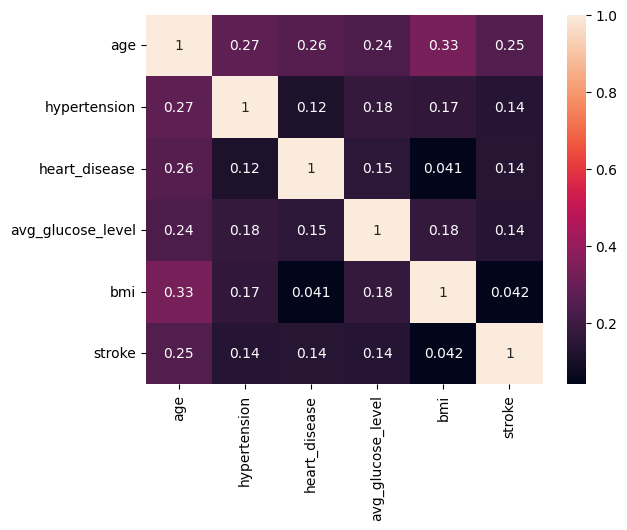

In [182]:
sns.heatmap(df.corr(),annot=True)

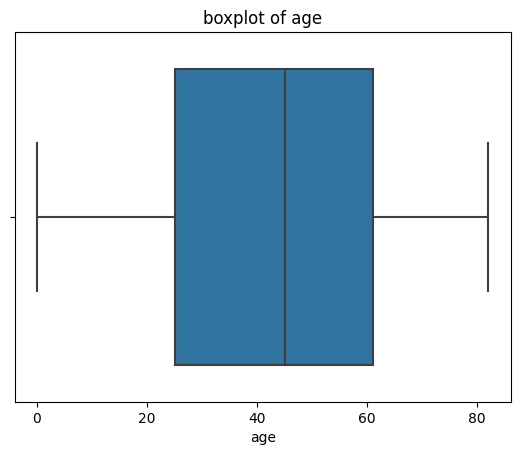

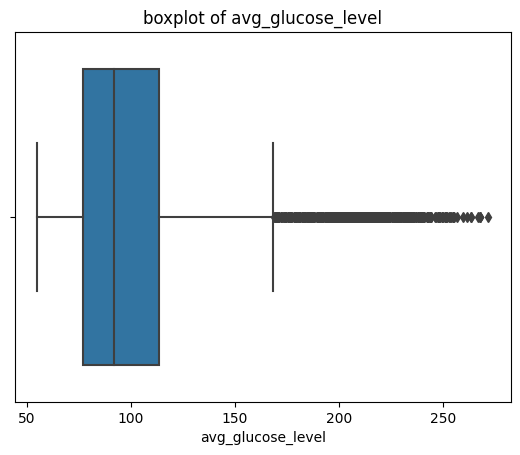

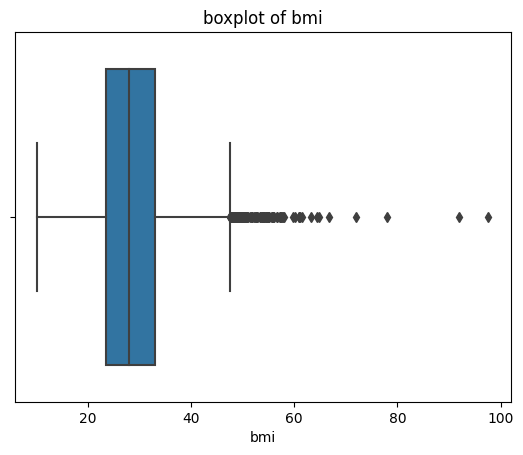

In [183]:
for i in num_col:
    sns.boxplot(df,x=df[i])
    plt.title(label = f'boxplot of {i}')
    plt.show()

In [184]:
def outlier(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3-q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1*IQR
    return col[(col>=lower_bound)&(col<=upper_bound)]

In [185]:
for i in num_col:
    df[i] = outlier(df[i])

In [186]:
for i in num_col:
    mean_val = df[i].mean()
    df[i].fillna(mean_val,inplace=True)

In [187]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])
encoder = LabelEncoder()
to_label_encode = ['ever_married','Residence_type']
df[to_label_encode] = df[to_label_encode].apply(encoder.fit_transform)
df = pd.get_dummies(df,columns=['gender','work_type','smoking_status'],drop_first=True)

In [188]:
df.head(2)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.06108,0,1,1,1,-7.448411e-16,1.432155,1,1,0,0,1,0,0,1,0,0
1,0.79554,0,0,1,0,-7.448411e-16,0.000000,1,0,0,0,0,1,0,0,1,0


In [189]:
x = df.drop('stroke',axis=1,inplace=False)
y = df['stroke']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [190]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [191]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
classification_report = classification_report(y_test,y_pred)
TP,FP,FN,TN = confusion_matrix(y_test,y_pred).ravel()

In [192]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1398
           1       0.20      0.22      0.21        85

    accuracy                           0.90      1483
   macro avg       0.58      0.58      0.58      1483
weighted avg       0.91      0.90      0.91      1483



In [193]:
print(TP,FP,FN,TN)

1323 75 66 19


In [194]:
desc = pd.DataFrame(index = list(df))
desc['dtypes'] = df.dtypes
desc['null_cnt'] = df.isnull().sum()
desc['count'] = df.shape[0]
desc['nunique'] = df.nunique()
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,dtypes,null_cnt,count,nunique,count,mean,std,min,25%,50%,75%,max
age,float64,0,4942,104,4942.0,-3.450632e-17,1.000101,-1.900572,-0.797697,8.743463e-02,0.795540,1.724929
hypertension,int64,0,4942,2,4942.0,9.206799e-02,0.289151,0.000000,0.000000,0.000000e+00,0.000000,1.000000
heart_disease,int64,0,4942,2,4942.0,5.018211e-02,0.218343,0.000000,0.000000,0.000000e+00,0.000000,1.000000
ever_married,int32,0,4942,2,4942.0,6.539862e-01,0.475746,0.000000,0.000000,1.000000e+00,1.000000,1.000000
Residence_type,int32,0,4942,2,4942.0,5.082962e-01,0.499982,0.000000,0.000000,1.000000e+00,1.000000,1.000000
avg_glucose_level,float64,0,4942,3218,4942.0,-5.837320e-16,1.000101,-1.823810,-0.674906,-7.448411e-16,0.517371,3.154427
bmi,float64,0,4942,302,4942.0,-2.472953e-16,1.000101,-2.857152,-0.688035,0.000000e+00,0.649316,2.427013
stroke,int64,0,4942,2,4942.0,4.896803e-02,0.215823,0.000000,0.000000,0.000000e+00,0.000000,1.000000
gender_Male,uint8,0,4942,2,4942.0,4.097531e-01,0.491838,0.000000,0.000000,0.000000e+00,1.000000,1.000000
gender_Other,uint8,0,4942,2,4942.0,2.023472e-04,0.014225,0.000000,0.000000,0.000000e+00,0.000000,1.000000
